<a href="https://colab.research.google.com/github/aidanjjoyce/Black-Hole-Simulations/blob/main/Black_Hole_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2D Black Holes Simulations

In [334]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

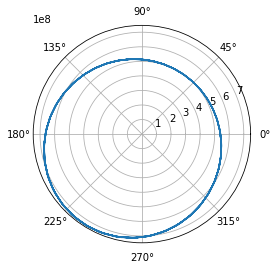

In [335]:
##Newtonian gravity

##Parameters required: k, h, G, M, r0
##Variables: u, p

r0, G, M, h = [5e8,0], 7e-11, 6e24, 5e11

def shape_eqn(r, p, G, M, h):
  return [r[1], 2/r[0]*r[1]**2 + r[0] - G*M*r[0]**2/h**2]

ps = np.linspace(1,10*np.pi,200)
rs = odeint(shape_eqn, r0, ps, args=(G,M,h))
rs = abs(rs[:,0])

plt.polar(ps, rs)
plt.show()

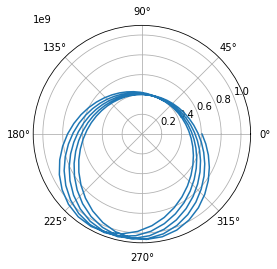

In [336]:
##Schwarzschild gravity precession

##Parameters required: k, h, G, M, r0
##Variables: u, p

r0, G, M, h, c = [4e8,0], 7e-11, 6e24, 5e11, 1e4

def shape_eqn(r, p, G, M, h, c):
  return [r[1], 2/r[0]*r[1]**2 + r[0] - G*M*r[0]**2/h**2 - 3*G*M/c**2]

ps = np.linspace(1,10*np.pi,200)
rs = odeint(shape_eqn, r0, ps, args=(G,M,h,c))
rs = abs(rs[:,0])

plt.polar(ps, rs)
plt.show()

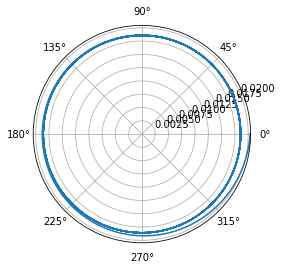

In [337]:
##Schwarzschild gravity infall

##Parameters required: k, h, G, M, r0
##Variables: u, p

r0, G, M, h, c = [5e8,0], 7e-11, 6e24, 5e11, 3e8
Rs = 2*G*M/c**2
r0 = [1.99*Rs, 0]
h = np.sqrt((G*M*r0[0]**2)/(r0[0]-3/2*Rs))

def shape_eqn(r, p, G, M, h, c):
  return [r[1], 2/r[0]*r[1]**2 + r[0] - G*M*r[0]**2/h**2 - 3*G*M/c**2]

ps = np.linspace(1,20*np.pi,10000)
rs = odeint(shape_eqn, r0, ps, args=(G,M,h,c))
rs = abs(rs[:,0])

plt.polar(ps, rs)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

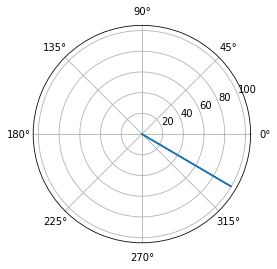

In [338]:
##Kerr metric orbit plotter

##Need to solve 3 coupled 1st order ODEs in r/t/p
k,c,a,h,mu = 1,1,0.5,10,1

def odes(x, tau,k,c,a,h,mu):
  #Assign each ODE to a vector
  k, c, a, h, mu

  T = x[0]
  R = x[1]
  P = x[2]

  #Define discriminant
  D = R**2 - 2*mu*R + a**2

  dt = (k*c*((R+2*mu)*a**2 + R**3) - 2*h*a*mu) / (R*D*c)
  dp = (h*(R - 2*mu) + 2*k*c*a*mu) / (R*D)
  dr = np.sqrt(c**2*(k**2 - 1) + 2*mu*c**2/R - (h**2 - a**2*c**2*(k**2 - 1))/R**2 + 2*mu*(h-a*c*k)**2/R**3)
  
  return [dt,dp,dr]

x0 = [0, 100, 0]
t = np.linspace(0,1,1000)
y = odeint(odes,x0,t, args=(k,c,a,h,mu))

plt.polar(y[2],y[1])
plt.show

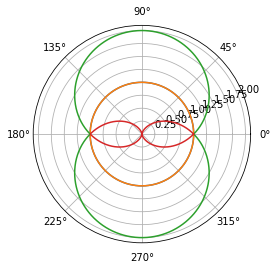

In [340]:
##Event horizon and ergosphere plotter

mu, a = 1, 1*mu

def event_horizon():
  return [mu+np.sqrt(mu**2 - a**2), mu-np.sqrt(mu**2 -a**2)] 

def SLS(T):
  return [mu+np.sqrt(mu**2 - a**2 * np.cos(T)**2), mu-np.sqrt(mu**2 -a**2 * np.cos(T)**2)]

T = np.linspace(0,2*np.pi,1000)
EH0 = np.full((1000,), event_horizon()[0])
EH1 = np.full((1000,), event_horizon()[1])

plt.polar(T,EH0)
plt.polar(T,EH1)
plt.polar(T,SLS(T)[0])
plt.polar(T,SLS(T)[1])
